In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/con-mat/1_I7KT0RgsHaWf0KZETJf56g.png


In [2]:
card = pd.read_csv("../input/creditcardfraud/creditcard.csv")
card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Check for missing values in the columns

In [3]:
card.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Identifying which transactions are fraud with **Fraud = 1** and **Non-Fraud = 0**

In [4]:
card['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

There were about .1727% cases of fraud in the credit card transactions

PCA scatterplot

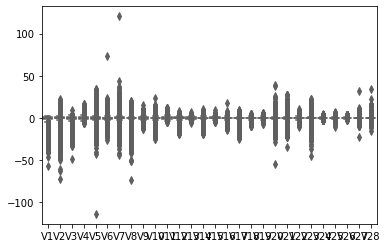

In [5]:
v_cols = card.drop(columns=['Time', 'Amount', 'Class'])
sns.boxplot(data=v_cols, palette="Set3")

Fraud amount during a specific time

In [6]:
fraud = card.loc[card['Class'] == 1]
no_fraud = card.loc[card['Class'] == 0]

Scatterplot of the fraudulent transaction amount over the 2 day period

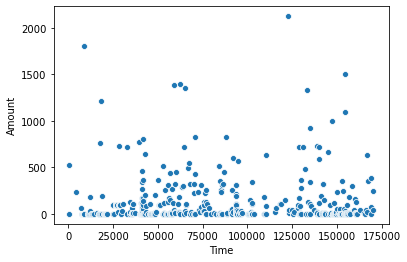

In [7]:
sns.scatterplot(x="Time", y="Amount", data=fraud)

In [8]:
print("The most fraud done in the transaction over the past 2 days was {}".format(fraud.Amount.max()))
print("The average fraud done in the transaction over the past 2 days was {}".format(fraud.Amount.mean()))

The most fraud done in the transaction over the past 2 days was 2125.87
The average fraud done in the transaction over the past 2 days was 122.21132113821133


Scatterplot of the non-fraudulent transaction amount over the 2 day period

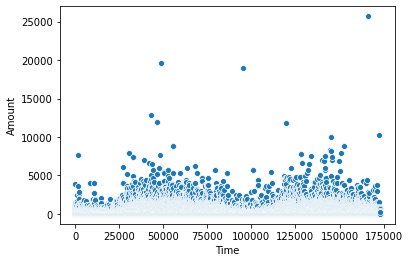

In [9]:
sns.scatterplot(x="Time", y="Amount", data=no_fraud)

In [10]:
print("The most non-fraud done in the transaction over the past 2 days was {}".format(no_fraud.Amount.max()))
print("The average non-fraud done in the transaction over the past 2 days was {}".format(no_fraud.Amount.mean()))

The most non-fraud done in the transaction over the past 2 days was 25691.16
The average non-fraud done in the transaction over the past 2 days was 88.29102242225574


In [11]:
X_var=card.drop(['Class'], axis=1)
y_var=card["Class"]
print(X_var.shape)
print(y_var.shape)
X=X_var.values
y=y_var.values

(284807, 30)
(284807,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, test_size=0.30, random_state=1)
card_model = DecisionTreeClassifier()
card_model.fit(X_train, y_train)
card_preds = card_model.predict(X_test)
print(mean_absolute_error(y_test, card_preds))

0.0009245930035228164


Confusion Matrix

In [13]:
con_mat = confusion_matrix(y_test, card_preds)
con_mat

array([[85266,    42],
       [   37,    98]])

In [14]:
tp = con_mat[0][0]
fp = con_mat[0][1]
tn = con_mat[1][1]
fn = con_mat[1][0]
precision = (tp)/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
recall_score = (tp)/(tp+fp)

Precision - Predicting "yes" and being correct

Accuracy - Being correct with any prediction

Sensitivity - Predicting "yes" and being correct with the "yes" predictions (true positive rate)

Specificity - Predicting "no" and being correct with the "no" predictions (true negative rate)

Recall Score - Being correct with all of the positive predictions

In [15]:
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Recall Score:", recall_score)

Precision: 0.9995076663384442
Accuracy: 0.9990754069964772
Sensitivity: 0.9995662520661641
Specificity: 0.7
Recall Score: 0.9995076663384442


The specificity is the least accurate measurement in this classifier. Some of the "no" predictions may actually be false. The model appears to work well since a majority of scores are around 99%.

Conclusion: It is .1727% likely that fraud will happen in this particular bank